In [1]:
import numpy as np
import matplotlib.pyplot as plt

from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.datasets import mnist
from keras.utils import np_utils

np.random.seed(9)

Using TensorFlow backend.


In [2]:
# user inputs
nb_epoch = 25
num_classes = 10
batch_size = 128
train_size = 60000
test_size = 10000
v_length = 784

In [3]:
# split the mnist data into train and test
(trainData, trainLabels), (testData, testLabels) = mnist.load_data()
print("[INFO] train data shape: {}".format(trainData.shape))
print("[INFO] test data shape: {}".format(testData.shape))
print("[INFO] train samples: {}".format(trainData.shape[0]))
print("[INFO] test samples: {}".format(testData.shape[0]))

[INFO] train data shape: (60000, 28, 28)
[INFO] test data shape: (10000, 28, 28)
[INFO] train samples: 60000
[INFO] test samples: 10000


In [5]:
trainData = trainData.reshape(60000, 784)
testData = testData.reshape(10000, 784)
trainData = trainData.astype("float32")
testData = testData.astype("float32")
trainData /= 255
testData /= 255

In [6]:
# convert class vectors to binary class matrices --> one-hot encoding
mTrainLabels = np_utils.to_categorical(trainLabels, num_classes)
mTestLabels = np_utils.to_categorical(testLabels, num_classes)



In [7]:
mTrainLabels[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [8]:
#Two hidden layers are used with 512 neurons in hidden layer 1 and 256 neurons in hidden layer 2, 
#followed by a fully connected layer of 10 neurons for taking the probabilities of all the class labels.

#ReLU is used as the activation function for hidden layers and 
#softmax is used as the activation function for output layer.

# create the model
model = Sequential()
model.add(Dense(512, input_shape=(784,)))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(256))
model.add(Activation("relu"))
model.add(Dropout(0.2))
model.add(Dense(num_classes))
model.add(Activation("softmax"))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
activation_1 (Activation)    (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 256)               131328    
_________________________________________________________________
activation_2 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                2570      
__________

In [9]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [10]:
history = model.fit(trainData, mTrainLabels, validation_data=(testData, mTestLabels), batch_size=batch_size, epochs=nb_epoch, verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/25
 - 7s - loss: 0.2642 - acc: 0.9215 - val_loss: 0.1124 - val_acc: 0.9656
Epoch 2/25
 - 7s - loss: 0.1071 - acc: 0.9670 - val_loss: 0.0817 - val_acc: 0.9739
Epoch 3/25
 - 7s - loss: 0.0768 - acc: 0.9764 - val_loss: 0.0701 - val_acc: 0.9785
Epoch 4/25
 - 7s - loss: 0.0577 - acc: 0.9816 - val_loss: 0.0662 - val_acc: 0.9803
Epoch 5/25
 - 7s - loss: 0.0490 - acc: 0.9843 - val_loss: 0.0694 - val_acc: 0.9786
Epoch 6/25
 - 7s - loss: 0.0403 - acc: 0.9873 - val_loss: 0.0638 - val_acc: 0.9811
Epoch 7/25
 - 8s - loss: 0.0350 - acc: 0.9885 - val_loss: 0.0607 - val_acc: 0.9821
Epoch 8/25
 - 7s - loss: 0.0313 - acc: 0.9898 - val_loss: 0.0757 - val_acc: 0.9790
Epoch 9/25
 - 7s - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0711 - val_acc: 0.9815
Epoch 10/25
 - 6s - loss: 0.0251 - acc: 0.9919 - val_loss: 0.0679 - val_acc: 0.9817
Epoch 11/25
 - 6s - loss: 0.0233 - acc: 0.9925 - val_loss: 0.0780 - val_acc: 0.9805
Epoch 12/25
 - 6s - loss: 0.0228 - 

In [12]:
scores = model.evaluate(testData, mTestLabels, verbose=0)

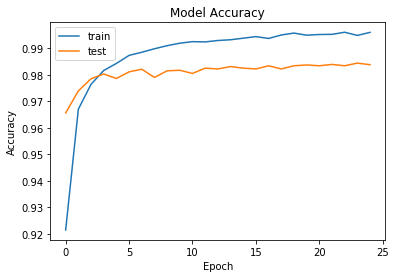

In [13]:
plt.plot(history.history["acc"])
plt.plot(history.history["val_acc"])
plt.title("Model Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend(["train", "test"], loc="upper left")
plt.show()

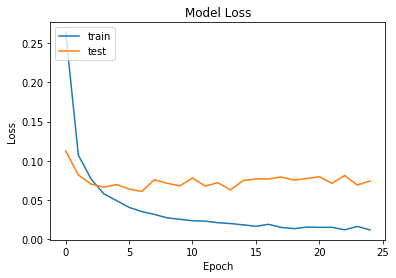

In [14]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Model Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["train", "test"], loc="upper left")
plt.show()

In [15]:
print("[INFO] test score - {}".format(scores[0]))
print("[INFO] test accuracy - {}".format(scores[1]))

[INFO] test score - 0.07407826047883141
[INFO] test accuracy - 0.9838


In [22]:
import matplotlib.pyplot as plt

test_images = testData[1:5]

In [23]:
test_images = test_images.reshape(test_images.shape[0], 28, 28)
print("[INFO] test images shape - {}".format(test_images.shape))

[INFO] test images shape - (4, 28, 28)


[INFO] I think the digit is - 2
[INFO] I think the digit is - 1
[INFO] I think the digit is - 0
[INFO] I think the digit is - 4


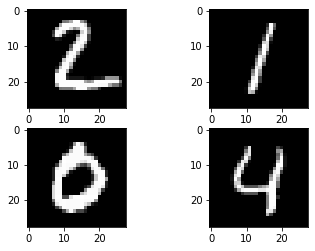

In [24]:
for i, test_image in enumerate(test_images, start=1):
	org_image = test_image
	
	test_image = test_image.reshape(1,784)
	
	prediction = model.predict_classes(test_image, verbose=0)
	
	print("[INFO] I think the digit is - {}".format(prediction[0]))
	plt.subplot(220+i)
	plt.imshow(org_image, cmap=plt.get_cmap('gray'))

plt.show()